In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
data = pd.read_csv('time-series-19-covid-combined.csv')

In [3]:
data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32307 entries, 0 to 32306
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            32307 non-null  object 
 1   Country/Region  32307 non-null  object 
 2   Province/State  9922 non-null   object 
 3   Lat             32307 non-null  float64
 4   Long            32307 non-null  float64
 5   Confirmed       32186 non-null  float64
 6   Recovered       30613 non-null  float64
 7   Deaths          32186 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.0+ MB


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32307 entries, 0 to 32306
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            32307 non-null  datetime64[ns]
 1   Country/Region  32307 non-null  object        
 2   Province/State  9922 non-null   object        
 3   Lat             32307 non-null  float64       
 4   Long            32307 non-null  float64       
 5   Confirmed       32186 non-null  float64       
 6   Recovered       30613 non-null  float64       
 7   Deaths          32186 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 2.0+ MB


In [7]:
dfDate = data.groupby(["Date"])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [8]:
recovered = dfDate[['Date', 'Recovered']]
for index, row in recovered.iterrows():
    if row['Recovered'] is None:
        row['Recovered'] = 0.0

In [9]:
death = dfDate[['Date', 'Deaths']]
for index, row in death.iterrows():
    if row['Deaths'] is None:
        row['Deaths'] = 0.0

In [10]:
confirmed = dfDate[['Date', 'Confirmed']]
for index, row in confirmed.iterrows():
    if row['Confirmed'] is None:
        row['Confirmed'] = 0.0

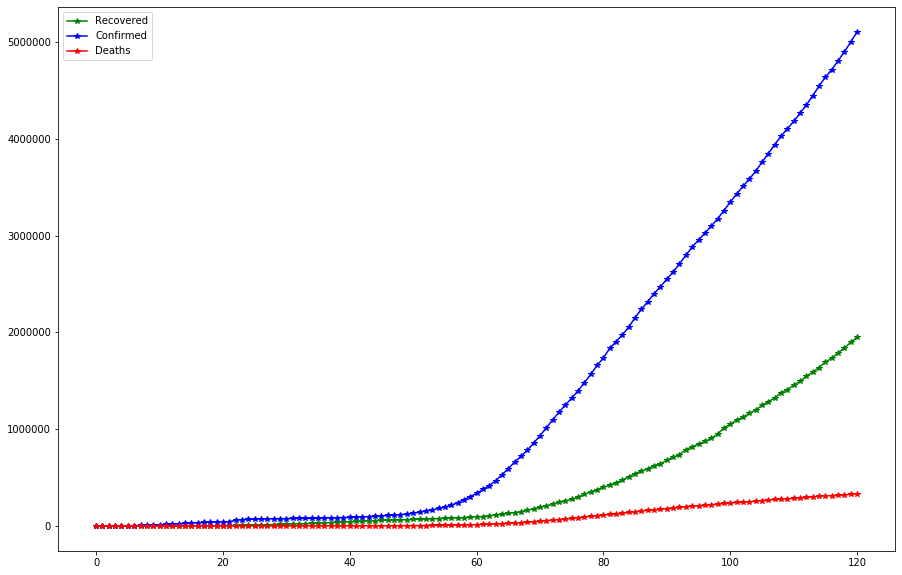

In [11]:
plt.figure(figsize=(15,10))
plt.plot(recovered["Recovered"],marker="*",color='g',label='Recovered')
plt.plot(confirmed["Confirmed"],marker='*',color='b', label='Confirmed')
plt.plot(death["Deaths"],marker="*",color='r',label='Deaths')
plt.legend()

In [20]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(recovered['Recovered'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   1.043199
p-value                          0.994701
#Lags Used                      12.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


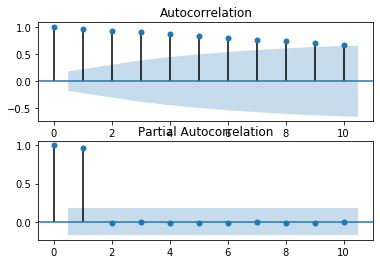

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(recovered["Recovered"], ax= plt.gca(), lags = 10)
plt.subplot(212)
plot_pacf(recovered["Recovered"], ax=plt.gca(), lags = 10)
plt.show()

In [ ]:
ts_log_diff = ts_log.passengers - ts_log.passengers.shift()
plt.plot(ts_log_diff)

In [17]:
recovered.head()

,Date,Recovered
0,2020-01-22,28.0
1,2020-01-23,30.0
2,2020-01-24,36.0
3,2020-01-25,39.0
4,2020-01-26,52.0


In [18]:
recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       121 non-null    datetime64[ns]
 1   Recovered  121 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [21]:
decomposition = sm.tsa.seasonal_decompose(recovered)
fig = decomposition.plot()
plt.show()

TypeError: float() argument must be a string or a number, not 'Timestamp'